# **`Analyze`**
In the analysis phase I analyzed the cleaned and transformed data, to gain a better understanding of its characteristics and patterns. I performed groupby function in pandas library and created charts, graphs and other visualization that helped me to derive insights, and identify patterns. 

###  Calculate the **Mean Trips Duration.**

In [35]:
# Calculate Mean trip duration by using mean() function.
mean_trip_duration = tripdata['trip_duration'].mean()
print('Mean Trip Duration is ',mean_trip_duration,'Minutes')

Mean Trip Duration is  15.954265225444223 Minutes


###  Calculate the **Maximum Ride Length.**

In [36]:
# Calculate Maximum trip duration using max() function.
max_trip_duration = tripdata['trip_duration'].max()
print('Maximum Trip Duration is ',max_trip_duration,'Minutes')

Maximum Trip Duration is  12136.3 Minutes


### Calculate the **Mode for Day of Week.**

In [37]:
# Find the mode by using mode() function.
mode_weekday = tripdata['day_of_week'].mode()
print('The mode for the day of week is',mode_weekday)

The mode for the day of week is 0    Saturday
Name: day_of_week, dtype: object


## Total Trips Taken by Members

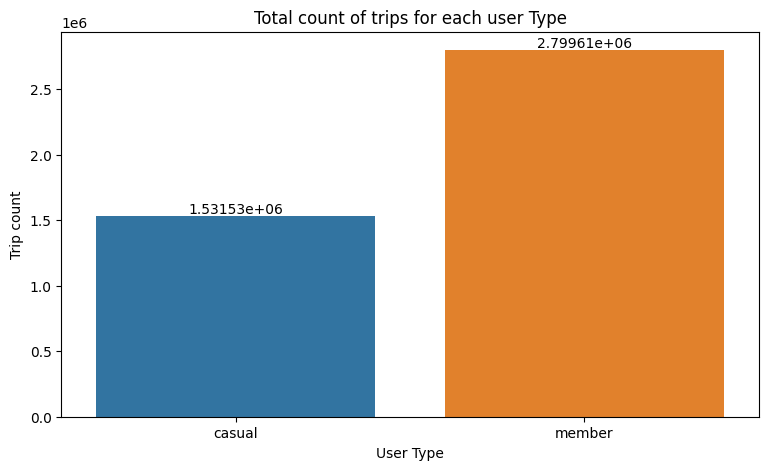

In [38]:
#Calculate &  Plot the total number of trips taken by both users.
total_trip_count = tripdata.groupby('user_type', as_index=True)[['start_station_name']].count()
ax = plt.figure(figsize =(9, 5))
ax = sns.barplot(data= total_trip_count, x= total_trip_count.index, y= 'start_station_name', hue = 'user_type')
for bars in ax.containers:
    ax.bar_label(bars, fontsize = 10)
plt.title('Total count of trips for each user Type')
plt.xlabel('User Type')
plt.ylabel('Trip count')
plt.show()

Above Bar Plot shows that annual members recorded 2,799,608 trips and casual members recorded 1,531,530 trips during in the year 2023.

## Most Used Type of Bike.

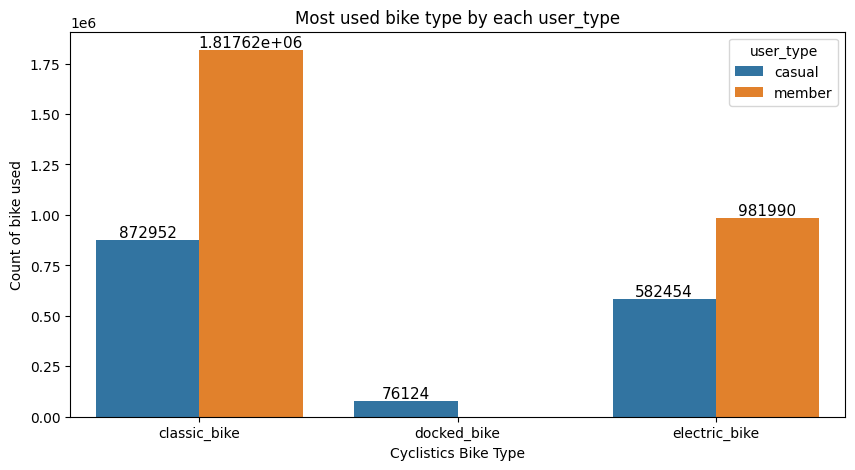

In [39]:
# Calculate & Plot most used type of bike by user type.
mean_trip_duration_dow = tripdata.groupby(["bike_type", "user_type"])["trip_duration"].count().reset_index()
#bike_used_type = tripdata.groupby("bike_type", as_index= True)[["trip_duration"]].mean() 
ax = plt.figure(figsize =(10, 5))
ax = sns.barplot(data= mean_trip_duration_dow, x= 'bike_type', y=  'trip_duration', hue= "user_type", palette= 'tab10')
for bars in ax.containers:
    ax.bar_label(bars, fontsize = 11)
plt.title('Most used bike type by each user_type')
plt.xlabel('Cyclistics Bike Type')
plt.ylabel('Count of bike used')
plt.show()

The above bar plot shows that In 2023, annual members recorded 1,817,618 trips on Classic Bikes and 981,990 trips on Electric Bikes . Annual members showed a preference for Classic Bikes over Electric Bikes. Casual members, on the other hand, preferred Classic Bikes as well, recorded 582,592 trips on Electric Bikes and 76,124 trips on Docked Bikes.It's worth noting that Docked Bikes were exclusively used by casual members.

## Total number of Hourly Trips in a day

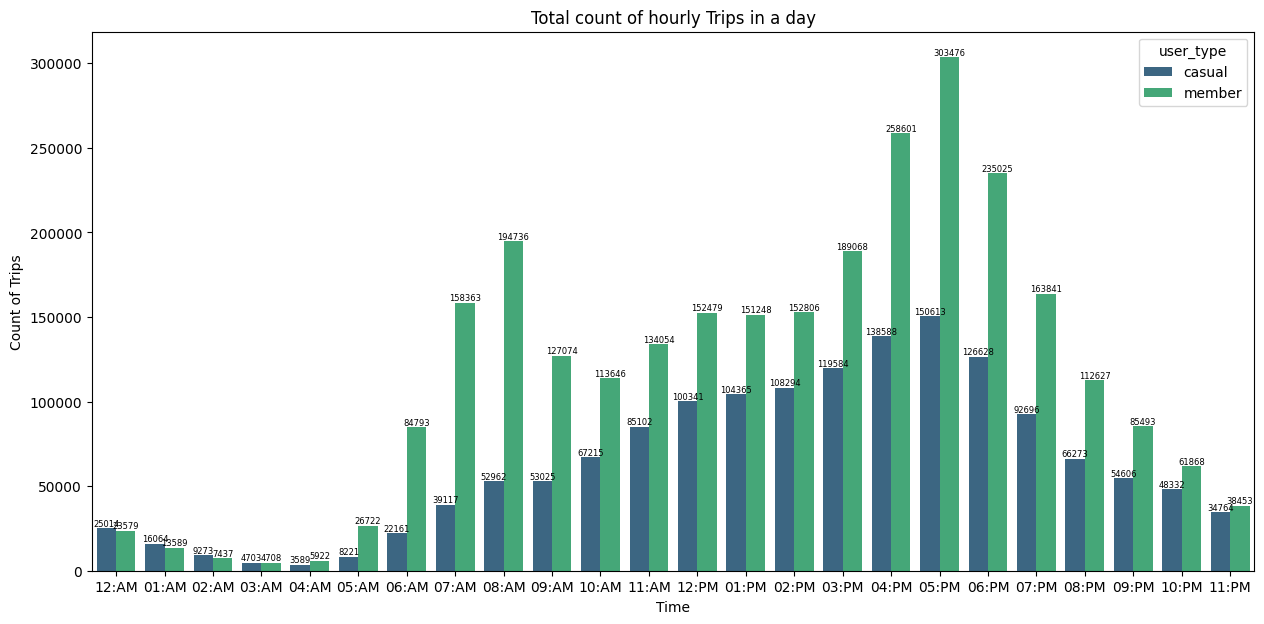

In [40]:
#Calculate the total Count of Hourly Trips in a day and create Bar plot.
count_day_trip = tripdata.groupby(["user_type","start_time_hour"])["trip_duration"].count().reset_index()
time_order = ['12:AM','01:AM','02:AM','03:AM','04:AM','05:AM','06:AM','07:AM','08:AM','09:AM','10:AM','11:AM','12:PM','01:PM','02:PM','03:PM','04:PM','05:PM','06:PM','07:PM','08:PM','09:PM','10:PM','11:PM']
ax = plt.figure(figsize =(15, 7))
ax = sns.barplot(data= count_day_trip, x= 'start_time_hour' , y= 'trip_duration',hue= 'user_type', order = time_order, palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars, fontsize = 6)
ax = plt.title('Total count of hourly Trips in a day')
ax =plt.xlabel('Time')
ax =plt.ylabel('Count of Trips')
plt.show()

During the year, annual members predominantly used bikes for their job site commute at 8 AM. They recorded 194,736 trips,  and their return journey at 5 PM recorded 303,476 trips. Conversely, their least active period was at 3 AM recorded 4,703 trips. Casual members, on the other hand, had their highest bike usage at 5 PM recorded 150,613 trips and their lowest at 3 AM making 3,589 trips. Notably, casual members displayed a gradual increase in activity throughout the morning, leading up to their peak at the ending moments of afternoon.

## Trips Taken at the Each Day of the Week.

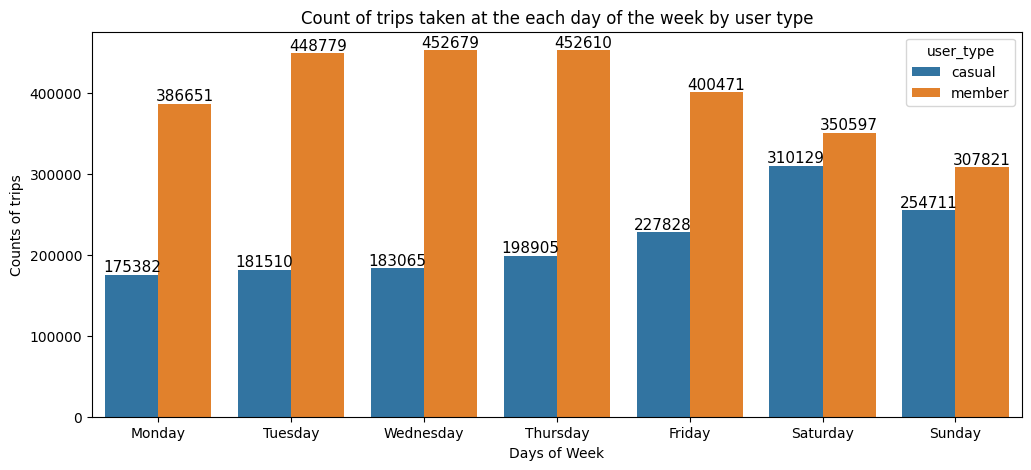

In [41]:
# Calculate the total Count of trips for each day of week. 
trip_count_dow = tripdata.groupby(["day_of_week","user_type"])["trip_duration"].count().reset_index()
# Set the day of week order.
Week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
# Create barplot to show the total count of trips for each day of week.
ax = plt.figure(figsize =(12, 5))
ax = sns.barplot(data= trip_count_dow, x= 'day_of_week' , y= 'trip_duration',hue= 'user_type', order = Week_days,  palette= 'tab10')
for bars in ax.containers:
    ax.bar_label(bars, fontsize = 11)
ax = plt.title('Count of trips taken at the each day of the week by user type')
ax =plt.xlabel('Days of Week')
ax =plt.ylabel('Counts of trips')
plt.show()

Annual members, Wednesday had the highest number of trips with 452,679 , while Sunday had the lowest with 307,821 trips . For casual members, Saturday was the most popular day with 310,129 trips, while Monday had the fewest trips at 4.05%.

## Total Number of Monthly Trips Taken Across the year 2023

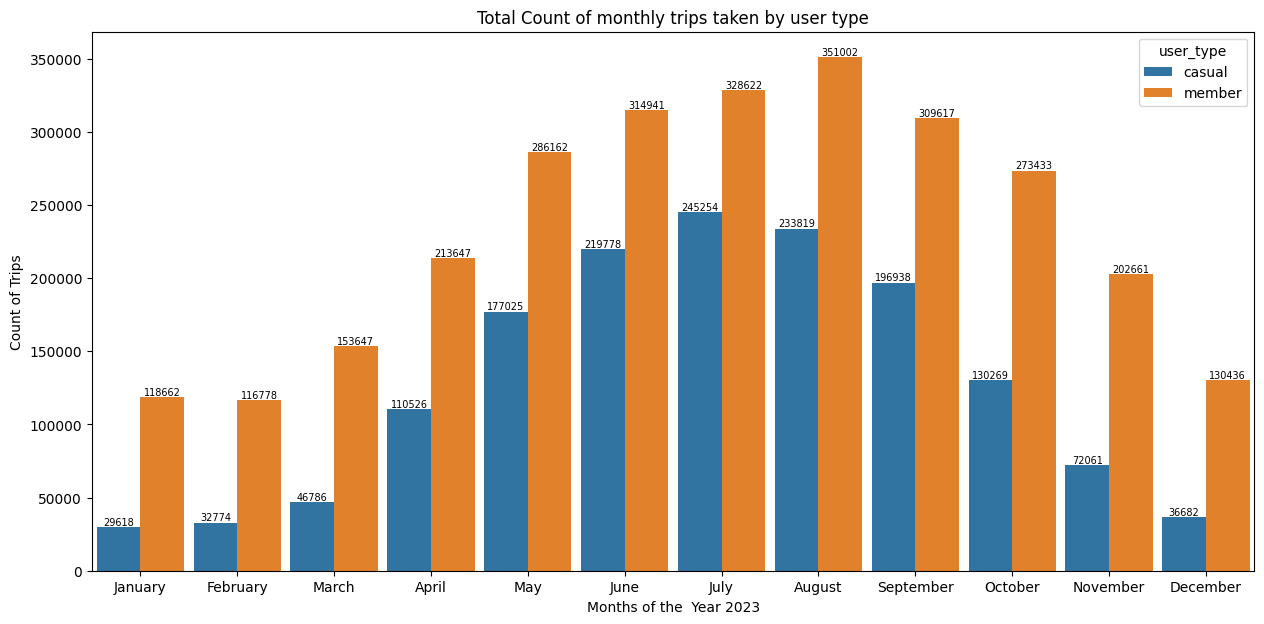

In [42]:
#Calculate the total number of monthly trips.
count_monthly_trips = tripdata.groupby(["user_type","month"])["trip_duration"].count().reset_index()
# Set the month order.
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
#Create Barplot to show the calculation.
ax = plt.figure(figsize =(15, 7))
ax = sns.barplot(data= count_monthly_trips, x= 'month' , y= 'trip_duration', width=0.9, hue= 'user_type', order = month_order)
for bars in ax.containers:
    ax.bar_label(bars, fontsize = 7)
ax = plt.title('Total Count of monthly trips taken by user type')
ax =plt.xlabel('Months of the  Year 2023')
ax =plt.ylabel('Count of Trips')
plt.show()

The above bar plot shows that In August 2023, annual members recorded their highest activity with 351,002 trips , while their lowest activity was in February 2023 with 116,778 trips. For casual members, their highest activity occurred in July 2023 with 245,254 trips, and their lowest activity was in January 2023 with 29,618 trips.

## Seasonal Trips taken by members.

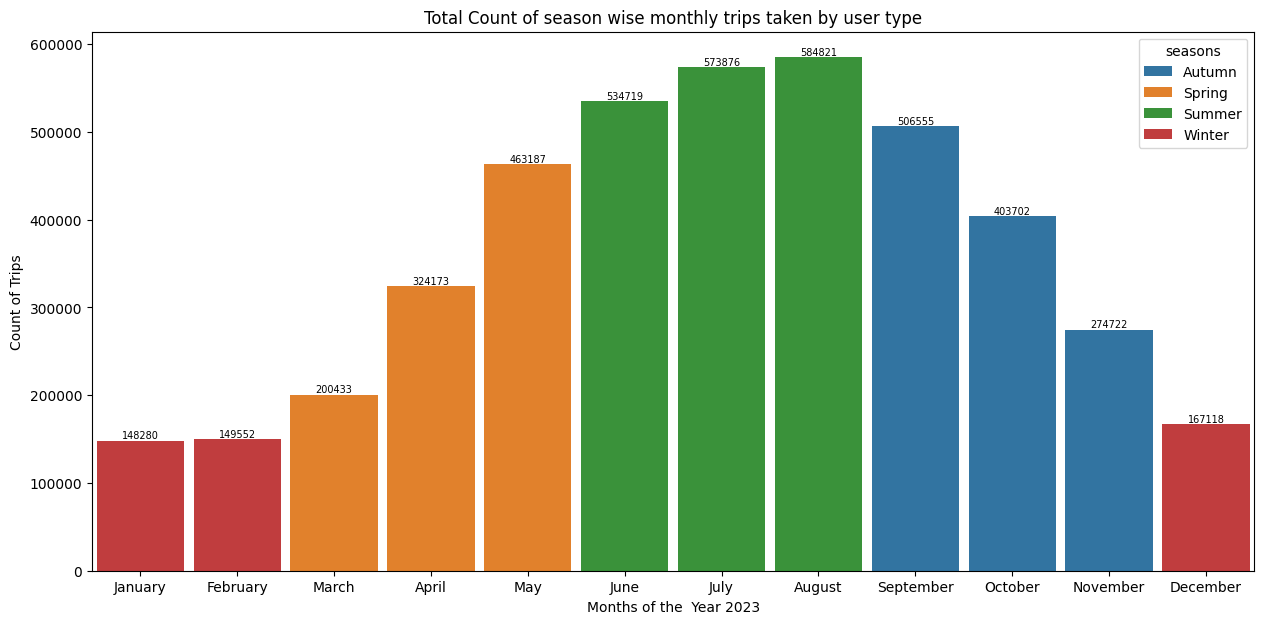

In [44]:
#Calculate the total number of season wise monthly trips.
count_seasonal_trips = tripdata.groupby(["seasons","month"])["trip_duration"].count().reset_index()
# Set the month order.
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
#Create Barplot to show the calculation.
ax = plt.figure(figsize =(15, 7))
ax = sns.barplot(data= count_seasonal_trips, x= 'month' , y= 'trip_duration', width=0.9, hue= 'seasons', order = month_order)
for bars in ax.containers:
    ax.bar_label(bars, fontsize = 7)
ax = plt.title('Total Count of season wise monthly trips taken by user type')
ax =plt.xlabel('Months of the  Year 2023')
ax =plt.ylabel('Count of Trips')
plt.show()

Summer was the busiest season counting for total rides made by both user type and winter was least busiest counting for total rides. 

## Average Hourly Trips Duration in a Day

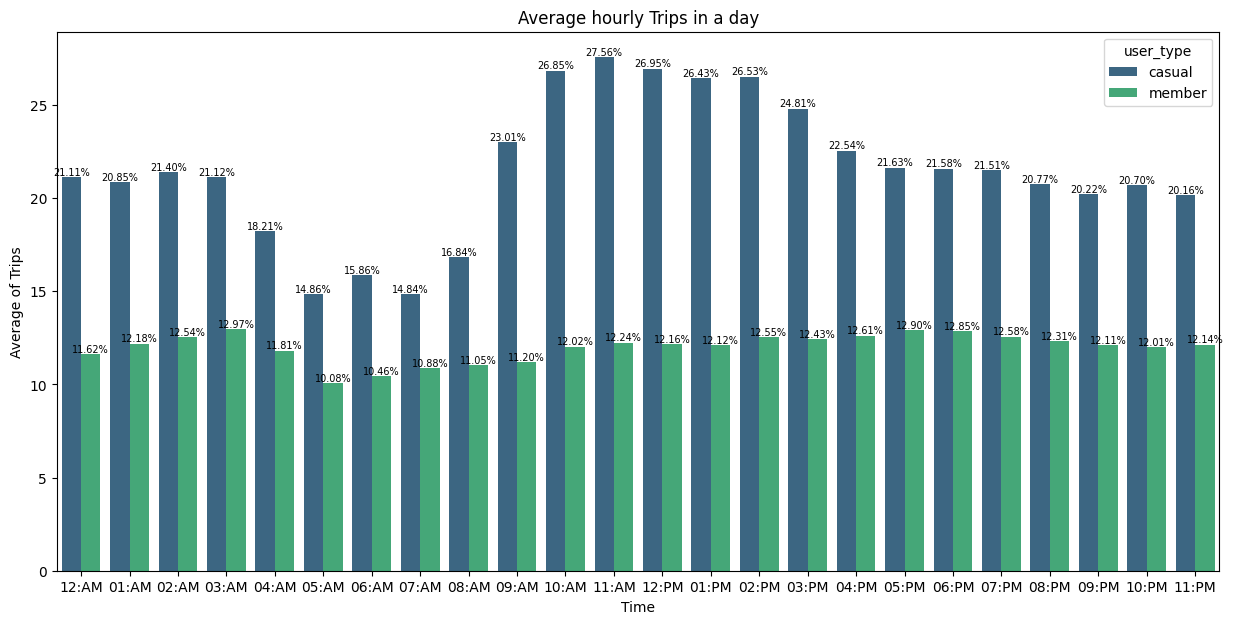

In [45]:
# Calculate the average of hourly trips taken in a day.
avg_hourly_trip = tripdata.groupby(["user_type","start_time_hour"])["trip_duration"].mean().reset_index()
# Set the time order.
time_order = ['12:AM','01:AM','02:AM','03:AM','04:AM','05:AM','06:AM','07:AM','08:AM','09:AM','10:AM','11:AM','12:PM','01:PM','02:PM','03:PM','04:PM','05:PM','06:PM','07:PM','08:PM','09:PM','10:PM','11:PM']
# Create the Barplot to show the average hourly trips taken in a day.
ax = plt.figure(figsize =(15, 7))
ax = sns.barplot(data= avg_hourly_trip, x= 'start_time_hour' , y= 'trip_duration',hue= 'user_type', order = time_order, palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f%%', fontsize=7)
ax = plt.title('Average hourly Trips in a day')
ax =plt.xlabel('Time')
ax =plt.ylabel('Average of Trips')
plt.show()

Above bar plot shows that during the year, it was observed that annual members maintained a consistent average trip duration throughout the day. In contrast, casual members exhibited higher average trip durations in the afternoon. Notably, casual members recorded the highest average trip duration, which accounted for 27.56% of the total.

## Average Trips Duration  Across the Week.

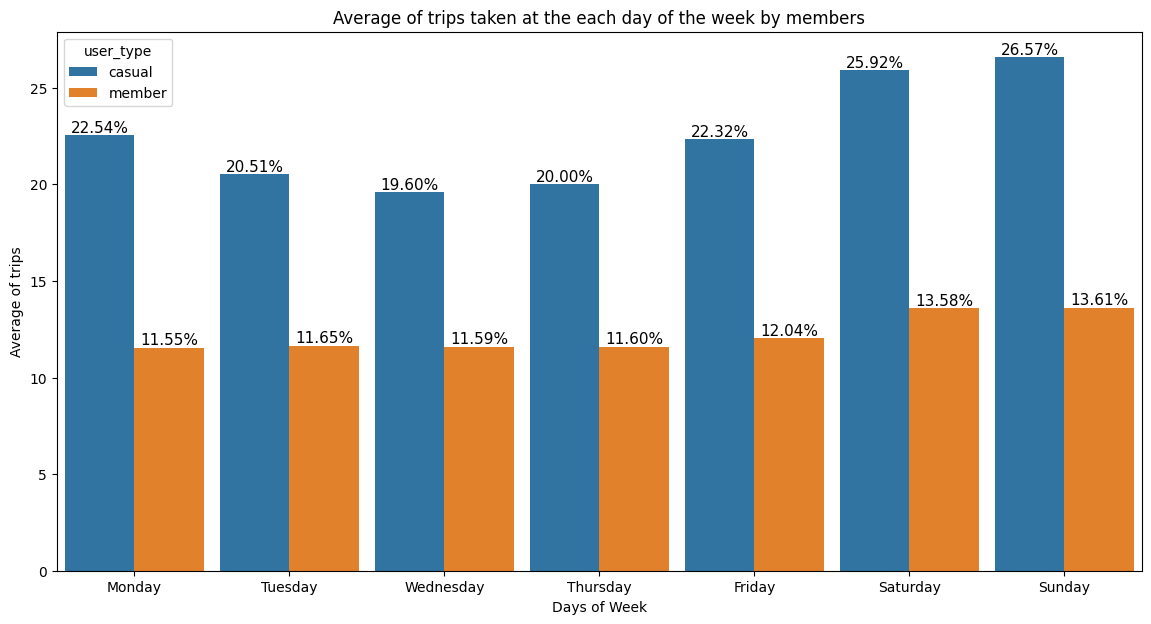

In [46]:
# Calculate the average trips duration taken by user type in each day of the week.
avg_trip_duration_atd = tripdata.groupby(["day_of_week","user_type"])["trip_duration"].mean().reset_index()
# Set the day order for week.
Week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
# Create Barplot to show the average trips duration taken by user type in each day of the week.
ax = plt.figure(figsize =(14, 7))
ax = sns.barplot(data= avg_trip_duration_atd, x= 'day_of_week' , y= 'trip_duration',width=0.9,hue= 'user_type', order = Week_days,  palette= 'tab10')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f%%', fontsize = 11)
ax = plt.title('Average of trips taken at the each day of the week by members')
ax =plt.xlabel('Days of Week')
ax =plt.ylabel('Average of trips')
plt.show()

Above bar plot shows that on Sundays, annual members have the highest average trip duration of 13.61 minutes, while on Mondays, they have the lowest average trip duration of 11.55 minutes. In contrast, casual members have the highest average trip duration of 26.57 minutes on Sundays and the lowest average trip duration of 19.60 minutes on Wednesdays. Throughout the week, casual riders consistently have a higher average trip duration compared to annual members.

## Average Monthly Trips Duration Across the Year 2023.

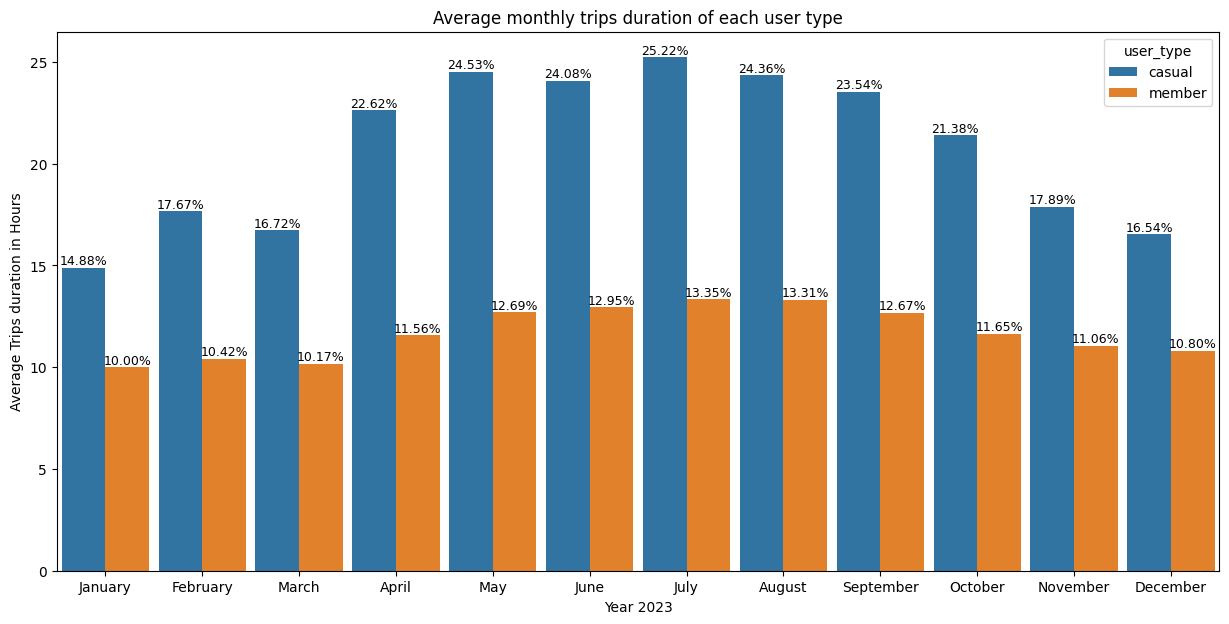

In [47]:
# Average monthly trips duration taken by each user type in the year 2023.
avg_monthly_dur = tripdata.groupby(["user_type","month"])["trip_duration"].mean().reset_index()
# Set Month order.
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
# Create Barplot to show the average monthly trips duration taken by user type.
ax = plt.figure(figsize =(15, 7))
ax = sns.barplot(data= avg_monthly_dur, x= 'month' , y= 'trip_duration', width=0.9, hue= 'user_type', order = month_order)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f%%', fontsize = 9)
ax = plt.title('Average monthly trips duration of each user type')
ax =plt.xlabel('Year 2023')
ax =plt.ylabel('Average Trips duration in Hours')
plt.show()

Above bar plot shows that In July 2023, annual members had the highest average trip duration at 13.35%, while in January 2023, they had the lowest average trip duration at 10.00%. For casual members, the highest average trip duration was also in July 2023 at 25.22%, and the lowest was in January 2023 at 14.88%. Notably, both user types experienced their highest average trip durations during the summer season (June 2023 to August 2023).

## Average Trip Distance Covered Across The Week.

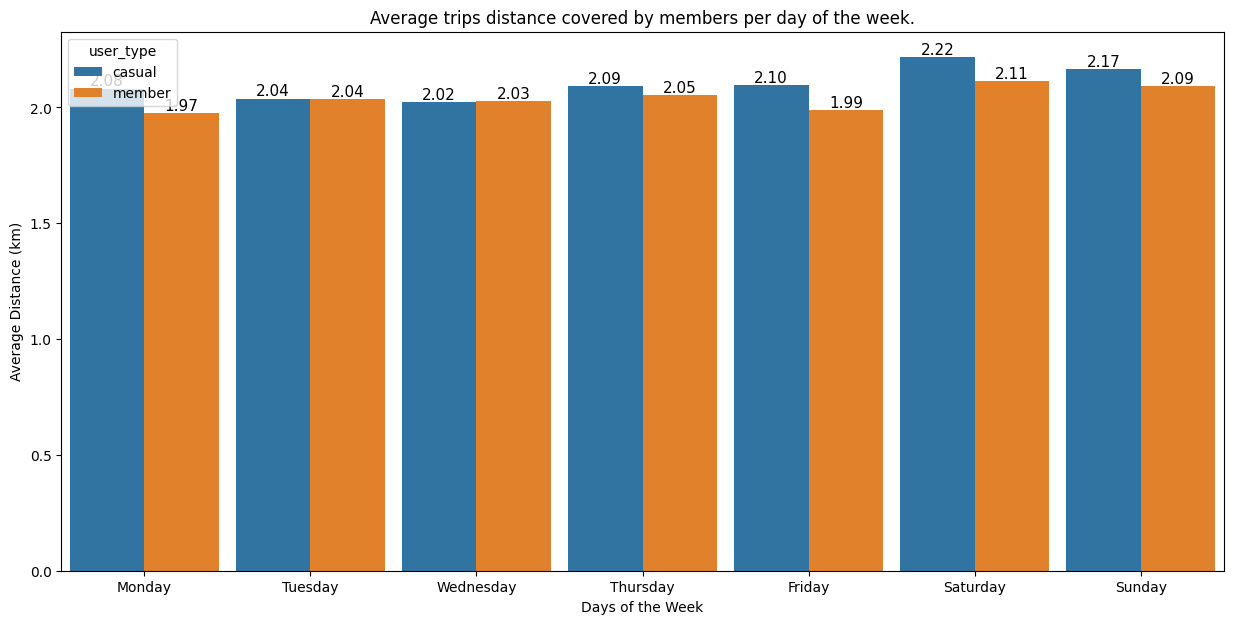

In [48]:
# Calculate the average trips distance covered by user type in each day of the week.
avg_dist_dow = tripdata.groupby(["user_type","day_of_week"])["distance_km"].mean().reset_index()
# Set the day of week order.
Week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
# Create Barplot to show the average trips distance covered by user type in each day of the week.
ax = plt.figure(figsize =(15, 7))
ax = sns.barplot(data= avg_dist_dow, x= 'day_of_week' , y= 'distance_km', width=0.9, hue = 'user_type', order = Week_days,  palette= 'tab10')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f', fontsize = 11)
ax = plt.title('Average trips distance covered by members per day of the week.')
ax =plt.xlabel('Days of the Week')
ax =plt.ylabel('Average Distance (km)')
plt.show()

Above bar plot shows that on Saturdays, annual members covered the highest average distance of 2.11 kilometers, while on Mondays, they covered the lowest average distance of 1.97 kilometers. In comparison, casual members covered the highest average distance of 2.22 kilometers on Saturdays and the lowest average distance of 2.02 kilometers on Wednesdays. It is noteworthy that casual members consistently covered a higher average trip distance than annual members throughout the week.

## Average Trips Distance Covered Across The Year 2023.

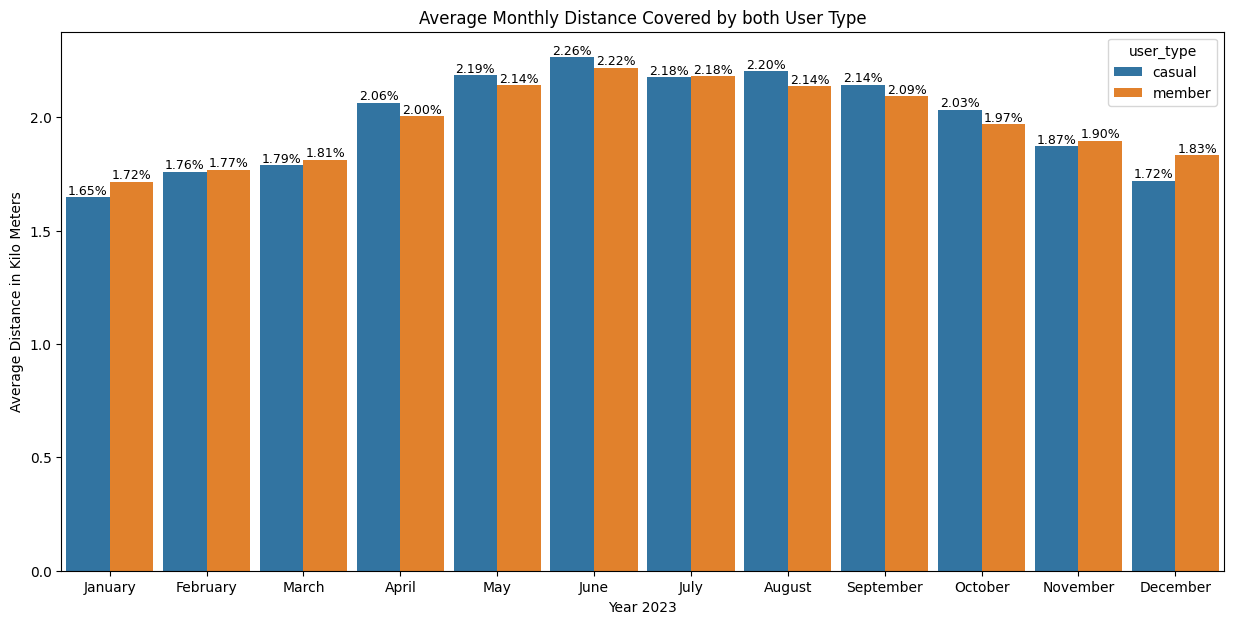

In [49]:
# Average monthly trips distance covered by each user type in the year 2023.
avg_monthly_dist = tripdata.groupby(["user_type","month"])["distance_km"].mean().reset_index()
# Set Month order.
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
# Create barplot to show the average monthly trips distance covered by user type.
ax = plt.figure(figsize =(15, 7))
ax = sns.barplot(data= avg_monthly_dist, x= 'month' , y= 'distance_km', width=0.9, hue= 'user_type', order = month_order)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f%%', fontsize = 9)
ax = plt.title('Average Monthly Distance Covered by both User Type')
ax =plt.xlabel('Year 2023')
ax =plt.ylabel('Average Distance in Kilo Meters')
plt.show()

Above bar plot shows that In Jun 2023, annual members covered the highest average distance of 2.22 kilometers and the lowest average distance of 1.72 kilometers in Februrary. Similarly, casual members covered the highest average distance of 2.26 kilometers and the lowest average distance of 1.65 kilometers.

## Average trips Duration taken by members. 

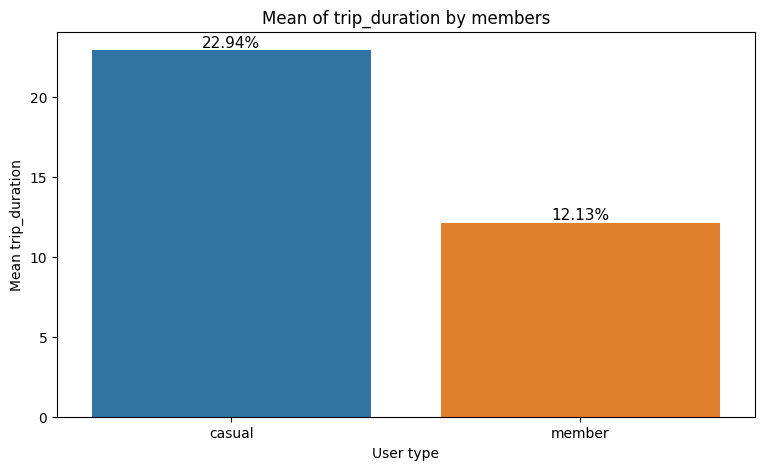

In [109]:
# #Plot the mean of trip_duration by each user type
mean_trip_duration = tripdata.groupby('user_type', as_index=True)[['trip_duration']].mean()
ax = plt.figure(figsize =(9, 5))
ax = sns.barplot(data= mean_trip_duration, x= mean_trip_duration.index, y= 'trip_duration', hue = 'user_type')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f%%',fontsize = 11)
plt.title('Mean of trip_duration by members')
plt.xlabel('User type')
plt.ylabel('Mean trip_duration')
plt.show()

Annual members have an average trip duration of 12.13 minutes, while casual members have an average trip duration of 22.94 minutes. Casual riders have used bikes more than annual members.

## Average Trips Distance Covered by Members. 

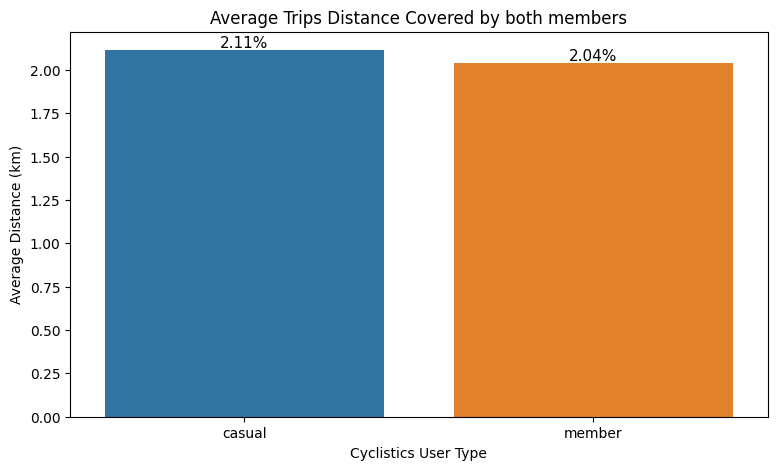

In [50]:
# Calculate the average trip distance covered by members.
avg_trip_dist = tripdata.groupby(["user_type"])["distance_km"].mean().reset_index()
#Create Barplot to show the average trip distance covered by members
ax = plt.figure(figsize =(9, 5))
ax = sns.barplot(data= avg_trip_dist, x= 'user_type', y=  'distance_km', hue = 'user_type',palette= 'tab10')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f%%', fontsize = 11)
plt.title('Average Trips Distance Covered by both members')
plt.xlabel('Cyclistics User Type')
plt.ylabel('Average Distance (km)')
plt.show()

Annual members have an average trip distance of 2.04 kilometers per trip, whereas casual members have a slightly higher average trip distance of 2.11 kilometers per trip. Notably, casual members also exhibit a higher average trip duration and overall distance traveled compared to annual members.